# Начало работы с пакетом interval в Octave

Для использования переменных интервального типа, связанных с ним операторов и функций необходимо загрузить пакет `interval`.

In [3]:
pkg load interval

## Конструкторы интервальных переменных

Пакет 'interval' содержит многочисленные конструкторы интервалов, порождающие интервал 
* по единственному числу, 
* паре чисел, задающих концы интервала 
* центру и радиусу интервала
* строковому представлению интервала
* и т.д.

In [3]:
## Интервал на основе действительного числа с совападающими концами
a = infsup(1) 

a = [1]


In [21]:
## Интервал с заданными границами
b = infsup(1, 2)

b = [1, 2]


In [17]:
## Граничные значения инетрвала могут быть заданы строками
c = infsup("3", "4")

c = [3, 4]


In [18]:
## Для числа, непредставимого числовым типом с плавающей точкой, 
## порождается интервал с представимыми границами, охватывающий это число 
d = infsup("1.1")

d ⊂ [1.0999, 1.1001]


In [19]:
## Входные числа могут задаваться в экспоненциальной форме 
e = infsup("5.8e-17")

e ⊂ [5.7999e-17, 5.8001e-17]


In [22]:
## Интрвал с центром в точке 12 и радиусом 3
f = midrad (12, 3)

f = [9, 15]_com


In [12]:
## То же для нецелых чисел
g = midrad ("4.2", "1e-3")

g ⊂ [4.1989, 4.2011]_com


In [13]:
## Интервал, озватывающий значения, перечисленные в произвольном порядке
h1 = hull (3, 42, "19.3", "-2.3")

h1 ⊂ [-2.3001, +42]_com


In [14]:
## Интервал для именованных констант
h2 = hull ("pi", "e")

h2 ⊂ [2.7182, 3.1416]_com


In [24]:
## Интервал по строковой записи
infsup ("[20, 4.2e10]")

ans = [20, 4.2e+10]


## Интервальные векторы и матрицы 
Векторы, матрицы и массивы интервалов могут быть созданы с помощью функций-конструкторов интервалов, если на вход им подать числовые массивы, строки или массивы ячеек (cell arrays). Элементы массивов ячеек могут иметь различные типы, что иногда оказвается удобным.

Интервальные массивы ведут себя обычные массивы Octave и могут использоваться для расширения (broadcasting) векторизации вычислений.

Создадим интервальные массивы.

In [28]:
M1 = infsup(magic (3))

M1 = 3×3 interval matrix

   [8]   [1]   [6]
   [3]   [5]   [7]
   [4]   [9]   [2]



In [29]:
M2 = infsup(magic (3), magic (3) + 1)

M2 = 3×3 interval matrix

   [8, 9]    [1, 2]   [6, 7]
   [3, 4]    [5, 6]   [7, 8]
   [4, 5]   [9, 10]   [2, 3]



In [31]:
M3 = infsupdec("1 [2, 3]; 4, 5, 6")

V1 = 2×3 interval matrix

   [1]_com   [2, 3]_com   [Empty]_trv
   [4]_com      [5]_com       [6]_com



In [32]:
M4 = infsupdec({1; eps; "4/7"; "pi"}, {2; 1; "e"; "0xff"})

M4 ⊂ 4×1 interval vector

              [1, 2]_com
     [2.2204e-16, 1]_com
   [0.57142, 2.7183]_com
       [3.1415, 255]_com



In [7]:
M5 = infsupdec(ones (2, 2, 2))

M5 = 2×2×2 interval array

ans(:,:,1) =

   [1]_com   [1]_com
   [1]_com   [1]_com

ans(:,:,2) =

   [1]_com   [1]_com
   [1]_com   [1]_com



Текстовое представление также может быть использовано для задания интервальных массивов (матриц). При этом злементы строк матриц в нем разделяются запятыми, а строки матриц - точкой с запятой. К сожалению, этот способ не позволяет описывать массивы размерности выше двух. В таких случаях в конструктор можно передавать  многомерные числовые масиивы или массивы ячеек. Еще один вариант - задавать многомерные массивы по частям.

In [5]:
A = infsupdec ("1 [2, 3]; 4, 5; 6, 7")
A(:,:,2) = infsupdec ("0.1, 0.2; 0.3, 0.4; 0.5, 0.6")

A = 3×2 interval matrix

   [1]_com   [2, 3]_com
   [4]_com      [5]_com
   [6]_com      [7]_com

A ⊂ 3×2×2 interval array

ans(:,:,1) =

   [1]_com   [2, 3]_com
   [4]_com      [5]_com
   [6]_com      [7]_com

ans(:,:,2) =

   [0.099999, 0.10001]_com   [0.19999, 0.20001]_com
    [0.29999, 0.30001]_com   [0.39999, 0.40001]_com
                 [0.5]_com   [0.59999, 0.60001]_com



## Классическая интервальная арифметика

Пакет interval включает множество интервальных арифметических операций и функций. Их полный перечень приведен в [документации](https://octave.sourceforge.io/interval/package_doc/Function-Names.html#Function-Names) к пакету. Имена функций по большей части соответствуют стандарту IEEE 1788-2015. 

Для интервальных арифметических операций развёрнутое
определение задаётся следующими формулами:

$\mathbf{a} + \mathbf{b} = [\underline{\mathbf{a}} + \underline{\mathbf{b}},\ \overline{\mathbf{a}} + \overline{\mathbf{b}}],$

$\mathbf{a} - \mathbf{b} = [\underline{\mathbf{a}} - \overline{\mathbf{b}},\ \overline{\mathbf{a}} - \underline{\mathbf{b}}],$

$\mathbf{a} \cdot \mathbf{b} = [\min(\underline{\mathbf{a}} \cdot \underline{\mathbf{b}}, \underline{\mathbf{a}} \cdot \overline{\mathbf{b}}, \overline{\mathbf{a}} \cdot \underline{\mathbf{b}}, \overline{\mathbf{a}} \cdot \overline{\mathbf{b}}),\ \max(\underline{\mathbf{a}} \cdot \underline{\mathbf{b}}, \underline{\mathbf{a}} \cdot \overline{\mathbf{b}}, \overline{\mathbf{a}} \cdot \underline{\mathbf{b}}, \overline{\mathbf{a}} \cdot \overline{\mathbf{b}})],$

$\mathbf{a}\; / \; \mathbf{b} = \mathbf{a} \cdot [1\;/\;\overline{\mathbf{b}},\ 1\;/\;\underline{\mathbf{b}}] \quad \mbox{для} \quad \mathbf{b} \not\owns 0.$ 


In [5]:
## Определим два интервала
a = infsup(1,2)
b = infsup(3,4)

## Результаты операций
s = a + b
d = a - b
m = a * b
r = a / b

a = [1, 2]
b = [3, 4]
s = [4, 6]
d = [-3, -1]
m = [3, 8]
r ⊂ [0.25, 0.66667]


Примеры использования интервальных функций.

In [3]:
sin (infsupdec (0.5))

power (infsupdec (2), infsupdec (3, 4))

atan2 (infsupdec (1), infsupdec (1))

midrad (magic (3), 0.5) * pascal (3)


ans ⊂ [0.47942, 0.47943]_com
ans = [8, 16]_com
ans ⊂ [0.78539, 0.7854]_com
ans = 3×3 interval matrix

   [13.5, 16.5]_com   [25, 31]_com   [42, 52]_com
   [13.5, 16.5]_com   [31, 37]_com   [55, 65]_com
   [13.5, 16.5]_com   [25, 31]_com   [38, 48]_com



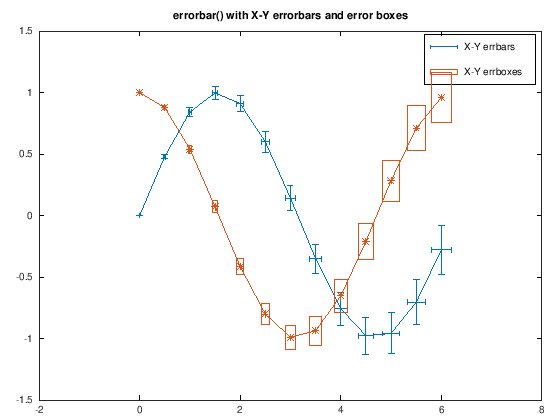

In [1]:
clf;
 x = 0:0.5:2*pi;
 err = x/30;
 y1 = sin (x);
 y2 = cos (x);
 errorbar (x, y1, err, err, err, err, "~>", ...
           x, y2, err, err, err, err, "#~>-*");
 legend ("X-Y errbars", "X-Y errboxes");
 title ("errorbar() with X-Y errorbars and error boxes");

intervals ⊂ 6×1 interval vector

            [1, 2]
            [3, 4]
            [4, 6]
          [-3, -1]
            [3, 8]
   [0.25, 0.66667]



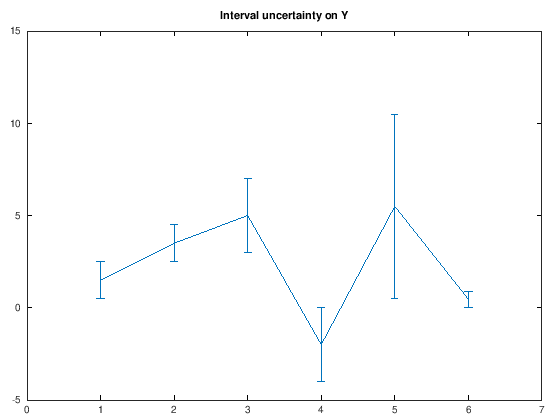

In [12]:
intervals = [a; b; s; d; m; r]

#intervals.inf
#intervals.sup

errorbar (1:6, mid(intervals), wid(intervals),"~");
#legend ("Интервальная неопределенгость по Y");
#title ("Интервальная неопределенность по Y");
title ("Interval uncertainty on Y");